# Homework 5 

Student: Justin Yu

Student Number: 1006747111

In [1]:
# import packages
import pandas as pd
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt;
from scipy import stats
import pymc as pm
import numpy as np

## Part 1: Bayesian Linear Regression Analysis

The data set we will be using is called 'California Housing Prices' found using this link: [https://www.kaggle.com/datasets/camnugent/california-housing-prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices). The dataset contains information on houses found in a given California district based on the 1990 census data. We use the variables "housing_median_age", "total_rooms", "total_bedrooms" and "median_house_value" for our bayesian linear regression analysis.

In [2]:
data = pd.read_csv('housing.csv')
data = data.dropna() # drop na values

In [3]:
X = data[["housing_median_age", "total_rooms", "total_bedrooms","median_house_value"]]
Y = data[["median_income"]]
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


We standardize the data to minimize the potential of numerical failures in pymc (which makes the data close to the priors already defined). Standardizing also allows us to exclude a the beta intercept in our analysis.

In [4]:
def standardize_data(X):
    # Standardize Data
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_std = (X - mean) / std
    return X_std

In [5]:
X_STD = standardize_data(X)
Y_STD = standardize_data(np.log(Y))

In [6]:
X_STD

,housing_median_age,total_rooms,total_bedrooms,median_house_value
0,0.982163,-0.803813,-0.970325,2.128819
1,-0.606210,2.042130,1.348276,1.313626
2,1.855769,-0.535189,-0.825561,1.258183
3,1.855769,-0.623510,-0.718768,1.164622
4,1.855769,-0.461970,-0.611974,1.172418
...,...,...,...,...
20635,-0.288535,-0.444580,-0.388895,-1.115492
20636,-0.844466,-0.887557,-0.920488,-1.124155
20637,-0.923885,-0.175042,-0.125472,-0.992477
20638,-0.844466,-0.355344,-0.305834,-1.058316


In [7]:
# Running Our Bayesian Linear Regression Analysis
p = 4
with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.TruncatedNormal('sigma', mu=0.4, sigma=1, lower=0) # half normal
    y = pm.Normal('y', mu=pm.math.dot(X_STD, betas), sigma=sigma, observed=Y_STD)

with MLR:
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 225 seconds.


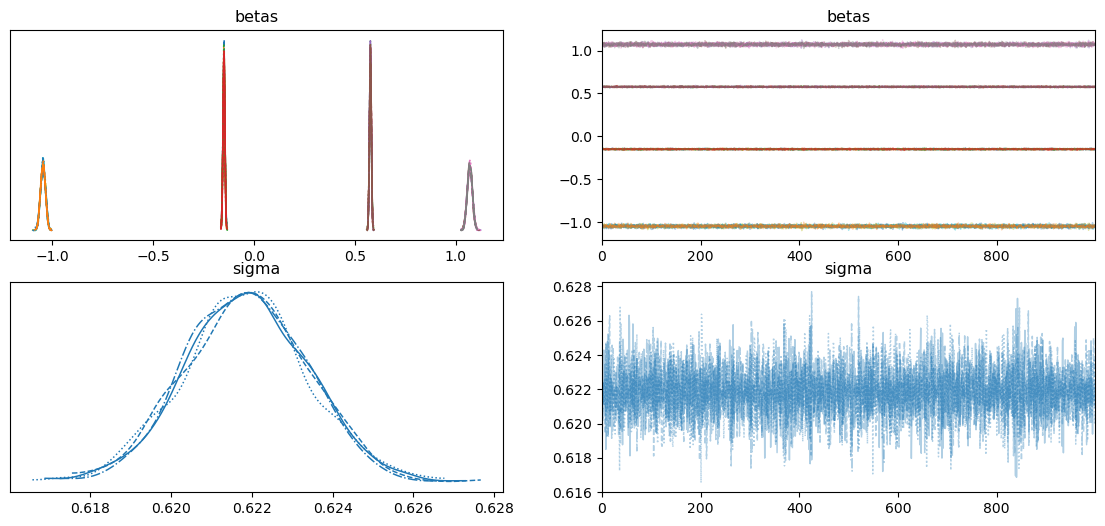

In [8]:
# Generating Trace Plots
fig,ax = plt.subplots(2,2, figsize=(14,6))
az.plot_trace(idata, axes=ax);

In [9]:
# Summary
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",-0.15,0.00,-0.16,-0.14,0.0,0.0,7548.70,2749.13,1.0
"betas[0, 1]",-0.15,0.00,-0.16,-0.14,0.0,0.0,7028.33,3067.85,1.0
"betas[0, 2]",-0.15,0.00,-0.16,-0.14,0.0,0.0,5987.96,3085.37,1.0
"betas[0, 3]",-0.15,0.00,-0.16,-0.14,0.0,0.0,6080.37,2944.72,1.0
"betas[1, 0]",1.07,0.01,1.05,1.09,0.0,0.0,3955.38,3299.97,1.0
"betas[1, 1]",1.07,0.01,1.05,1.10,0.0,0.0,3154.94,2854.18,1.0
"betas[1, 2]",1.07,0.01,1.05,1.09,0.0,0.0,3681.68,3065.17,1.0
"betas[1, 3]",1.07,0.01,1.05,1.09,0.0,0.0,3559.03,3256.26,1.0
"betas[2, 0]",-1.05,0.01,-1.07,-1.02,0.0,0.0,3996.15,3274.50,1.0
"betas[2, 1]",-1.05,0.01,-1.07,-1.02,0.0,0.0,3242.69,2837.49,1.0


The split r hat shown above indicates good similar convergence between the chains.

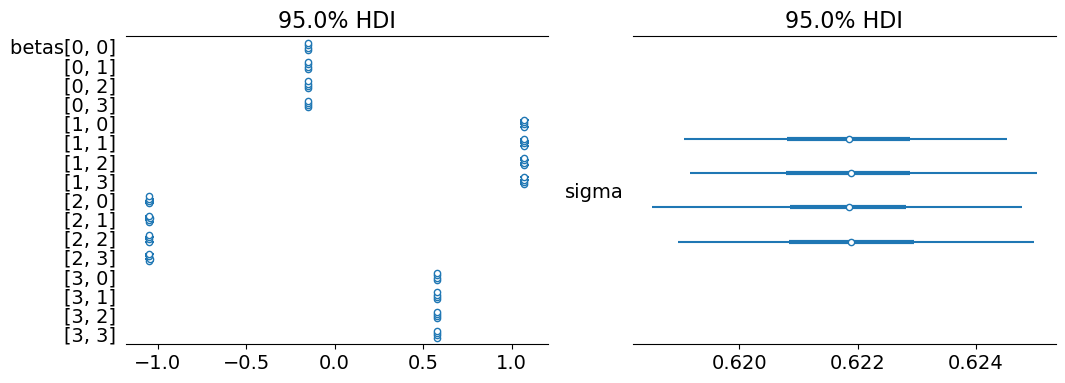

In [11]:
# Consturcting Bayesian Credible Intervals

fig,ax = plt.subplots(1,2, figsize=(12,4))
az.plot_forest(idata, var_names=["betas"], combined=False, hdi_prob=0.95, ax=ax[0]);
az.plot_forest(idata, var_names=["sigma"], combined=False, hdi_prob=0.95, ax=ax[1]);

## Part 2: Multivariate Normal Distribution

**2.1**

We have that the current probability distribuion of:

\begin{align*}
p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}) = {}& \mathcal{MVN}\left(E[\boldsymbol \beta | \boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \left[\mathbf{X}^{\top}\boldsymbol \Sigma^{-1} \mathbf{X} + \boldsymbol \Sigma_\beta^{-1}\right]^{-1}( \mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0), \text{Cov}[\boldsymbol \beta | \boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = [\mathbf{X}^{\top}\boldsymbol \Sigma^{-1} \mathbf{X} + \boldsymbol \Sigma_\beta^{-1}]^{-1}\right)
\end{align*}

When $\Sigma=\sigma^2I$, we can sub this term into the above giving us:

\begin{align*}
p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}) = {}& \mathcal{MVN}\left(E[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] = \left[\mathbf{X}^{\top}\boldsymbol (\sigma^2I)^{-1} \mathbf{X} + \boldsymbol \Sigma_\beta^{-1}\right]^{-1}( \mathbf{X}^\top \boldsymbol(\sigma^2I)^{-1}\mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0), \text{Cov}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] = \left[\mathbf{X}^{\top}\boldsymbol (\sigma^2I)^{-1} \mathbf{X} + \boldsymbol \Sigma_\beta^{-1}\right]^{-1}\right)
\end{align*}

$\mathbf{(\sigma^{2}I)^{-1} = \frac{1}{\sigma^{2}I} = \frac{1}{\sigma^{2}}(I)}$ since the inverse of the identity matrix is itself. Thus:

\begin{align*}
p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}) = {}& \mathcal{MVN}\left(E[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] = \left[\mathbf{X}^{\top} \frac{1}{\sigma^{2}}(I) \mathbf{X} + \boldsymbol \Sigma_\beta^{-1}\right]^{-1}( \mathbf{X}^\top \frac{1}{\sigma^{2}}(I)\mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0), \text{Cov}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] = \left[\mathbf{X}^{\top}\frac{1}{\sigma^{2}}(I) \mathbf{X} + \boldsymbol \Sigma_\beta^{-1}\right]^{-1}\right)
\end{align*}

$\sigma^{2}$ is a scalar so we can put it outside the bracket and since a matrix times the identity matrix is itself the equation reduces to:

\begin{align*}
p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}) = {}& \mathcal{MVN}\left(E[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] = \sigma^{2}\left[\mathbf{X}^{\top}\mathbf{X} + \boldsymbol \Sigma_\beta^{-1}\right]^{-1}( \frac{1}{\sigma^{2}} \mathbf{X}^\top \mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0), \text{Cov}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] = \sigma^{2}\left[\mathbf{X}^{\top}\mathbf{X} + \boldsymbol \Sigma_\beta^{-1}\right]^{-1}\right)
\end{align*}

**2.2**

From $p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y})$, we can see that $E[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] = \sigma^{2}\left[\mathbf{X}^{\top}\mathbf{X} + \boldsymbol \Sigma_\beta^{-1}\right]^{-1}( \frac{1}{\sigma^{2}} \mathbf{X}^\top \mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0)$

**2.3**

$E[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] $ is the posterior mean of $\beta$ and is represented as a weighted sum of the least squares estimate and the prior mean, where the weights are determined by the variance $\sigma^2$ and the prior covariance matrix, $\Sigma_{\beta}$. If the prior is non-informative, the influence of $\Sigma_{\beta}$ diminishes. Suppose that the hyperparameter of $\Sigma_{\beta}$ has no impact or is the zero matrix (which is illegal as it would make the prior covariance matrix singular and thus have no inverse). If it were possible, we can see that: $\boldsymbol\sigma^{2}$ cancels with $\frac{1}{\boldsymbol\sigma^{2}}$ giving: $[X^{\boldsymbol \top}X]^{-1}X^{\boldsymbol \top}y$

A zero $\beta_0$ hyperparameter with a very small $\Sigma_{\beta}^{-1}$ can also closely but not perfectly achieve $E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = (\mathbf{X^\top X})^{-1}\mathbf{X^\top y}$. This is because $\boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0 = 0$ since $\beta_0 = 0$. Also, a nice point to mention is that $\Sigma_{\beta}^{-1}$ gets smaller as the magnitude of the elements $\Sigma_{\beta}$ gets larger.
 

**2.4**

The same can be said about $\Sigma_{\beta}^{-1}$ and $\beta_0$ in order to make $E[  \mathbf{\hat y} = \mathbf{X}\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \mathbf{X}(\mathbf{X^\top X})^{-1}\mathbf{X^\top y}$. When the prior is non-informative, the influence of the prior covariance matrix $\Sigma_{\beta}$ diminishes and thus $E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = (\mathbf{X^\top X})^{-1}\mathbf{X^\top y}$ which means that $E[ \mathbf{X}\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \mathbf{X}(\mathbf{X^\top X})^{-1}\mathbf{X^\top y}$. However, when the prior is informative, it provides additional information that influences the posterior estimates and thus the posterior estimate for $\hat{y}$ will reflect a balance between the two sources of information.

**2.5**

From $p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y})$, we can see that $\text{Cov}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] = \sigma^{2}\left[\mathbf{X}^{\top}\mathbf{X} + \boldsymbol \Sigma_\beta^{-1}\right]^{-1}$, the variance, $\text{Var}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}]$ would be the values along the diagonal of the covariance matrix.

## Part 3: Bayesian Multivariate Normal Model

In [12]:
y_inf = data[["housing_median_age", "total_rooms", "total_bedrooms","median_house_value"]]
y_inf.describe()

,housing_median_age,total_rooms,total_bedrooms,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,2636.504233,537.870553,206864.413155
std,12.591805,2185.269567,421.385070,115435.667099
min,1.000000,2.000000,1.000000,14999.000000
25%,18.000000,1450.000000,296.000000,119500.000000
50%,29.000000,2127.000000,435.000000,179700.000000
75%,37.000000,3143.000000,647.000000,264700.000000
max,52.000000,39320.000000,6445.000000,500001.000000


To lower the computational costs for predicting and ensure convergence we scale our data to similar levels to each other. Also, given that our data is positively skewed, we use a gamma distribution to represent our standard deviation since it is strictly positive and more flexible.

In [13]:
y_inf.loc[:, "total_rooms"] = y_inf["total_rooms"] / 100 # total number of rooms per block (measured in 100)
y_inf.loc[:, "total_bedrooms"] = y_inf["total_bedrooms"] / 10 # total number of bedrooms per block (measured in 10)
y_inf.loc[:, "median_house_value"] = y_inf["median_house_value"] / 10000 # median_house_value (measured by 10k)

In [20]:
y_inf.describe()

,housing_median_age,total_rooms,total_bedrooms,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,26.365042,53.787055,20.686441
std,12.591805,21.852696,42.138507,11.543567
min,1.000000,0.020000,0.100000,1.499900
25%,18.000000,14.500000,29.600000,11.950000
50%,29.000000,21.270000,43.500000,17.970000
75%,37.000000,31.430000,64.700000,26.470000
max,52.000000,393.200000,644.500000,50.000100


In [17]:
p = 4
n = len(y_inf)
with pm.Model() as MNV_LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=p, eta=2.0,
                                 sd_dist=pm.Gamma.dist(alpha = 2, beta=2), compute_corr=False)
    L = pm.expand_packed_triangular(p, packed_L)
    mu = pm.Normal('mu', mu=np.zeros(p), sigma = 10, shape=p); 
    y = pm.MvNormal('y', mu=mu, chol=L, shape=(n,1), observed=y_inf) 
with MNV_LKJ:    
    idata = pm.sample(chains = 2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [packed_L, mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 597 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


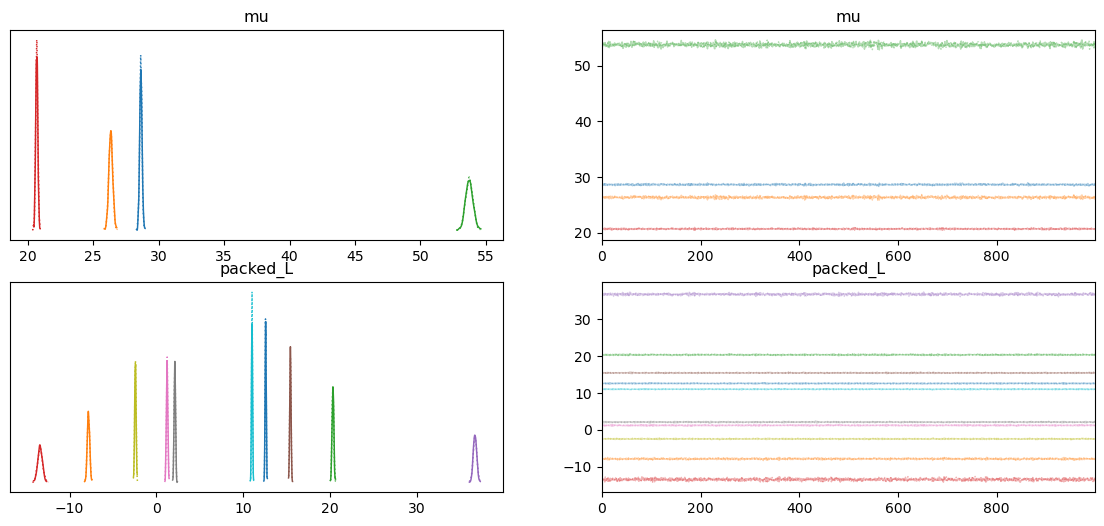

In [18]:
# Generating Trace Plots
fig,ax = plt.subplots(2,2, figsize=(14,6))
az.plot_trace(idata, axes=ax);

In [21]:
# Summary
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],28.64,0.09,28.45,28.80,0.00,0.0,3468.38,1619.25,1.00
mu[1],26.34,0.15,26.07,26.62,0.00,0.0,2459.67,1480.28,1.00
mu[2],53.73,0.28,53.20,54.25,0.01,0.0,2500.61,1756.05,1.00
mu[3],20.68,0.08,20.54,20.84,0.00,0.0,3331.82,1403.54,1.00
packed_L[0],12.58,0.06,12.47,12.69,0.00,0.0,2820.47,1806.36,1.00
packed_L[1],-7.83,0.14,-8.07,-7.56,0.00,0.0,2077.07,1284.63,1.00
packed_L[2],20.33,0.10,20.16,20.52,0.00,0.0,2334.41,1152.00,1.01
packed_L[3],-13.40,0.28,-13.92,-12.90,0.01,0.0,2125.97,1294.90,1.00
packed_L[4],36.70,0.20,36.31,37.08,0.00,0.0,2411.55,1093.08,1.01
packed_L[5],15.43,0.07,15.29,15.57,0.00,0.0,4194.24,1452.17,1.00
